# I/ Bản đồ không có điểm thưởng 

## 1/ Đọc file


In [3]:
import os
import matplotlib.pyplot as plt
from queue import PriorityQueue
import math
import copy



In [4]:
def read_file(file_name: str = 'maze.txt'):
  f=open(file_name,'r')
  n_bonus_points = int(next(f)[:-1])
  bonus_points = []
  for i in range(n_bonus_points):
    x, y, reward = map(int, next(f)[:-1].split(' '))
    bonus_points.append([x, y, reward])

  text=f.read()
  matrix=[list(i) for i in text.splitlines()]
  f.close()

  return bonus_points, matrix

## 2/ Xử lí hình vẽ mê cung (dùng code của thầy)

In [6]:
def visualize_maze(matrix,bonus, start,end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']

    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=100).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')
    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()



## 3/ Cài đặt thuật toán 

In [7]:
def adj(matrix, u):
    '''
    Trả về những điểm lân cận có thể di chuyển qua từ điểm u
    adjacency 
    '''
    result = []
    try:
        if matrix[u[0]-1][u[1]] != 'x':
            result.append([u[0]-1,u[1]])
    except: 
        pass
    try:
        if matrix[u[0]][u[1]-1] != 'x':
            result.append([u[0],u[1]-1])
    except: 
        pass
    try:
        if matrix[u[0]+1][u[1]] != 'x':
            result.append([u[0]+1,u[1]])
    except: 
        pass
    try:
        if matrix[u[0]][u[1]+1] != 'x':
            result.append([u[0],u[1]+1])
    except: 
        pass
    return result




In [8]:
def dfs(node, visited = [], path = []): 
    '''
    Thuật toán dfs dùng đệ qui để tìm đường ra 
    '''
    if node not in visited and end not in visited: 
        visited.append(node)
        path.append(node)
        for u in adj(matrix, node):
            dfs(u, visited, path) 
        if end not in path: 
            path.pop()
        else:
            return path


In [9]:
def bfs(start, end):
    '''
    Thuật toán bfs search theo từng tầng trong cây
    '''
    path = []
    path_queue = []
    path_queue.append([start])
    visited = []
    k = 1
    while k and path_queue != []:
        path = path_queue.pop(0)
        x = path[-1]
        for u in adj(matrix, x):
            if u not in visited:
                visited.append(u)
                if u == end: 
                    k = 0
                    break
                path_temp = copy.copy(path)
                path_temp.append(u)
                path_queue.append(path_temp)
    path.append(end)
    return path            

In [11]:
def Heuristic(u, end):
    '''
    Chọn hàm heuristic chính là khoảng cách Manhattan 
    '''
    return math.sqrt(abs(u[0]-end[0])**2+abs(u[1]-end[1])**2)
def greedy_best_first_search(start, end):
    '''
    Thuật toán tham lam 
    '''
    visited = []
    path_queue = PriorityQueue()
    path_queue.put((0, [start]))
    while path_queue.empty() == False:
        path = path_queue.get()[1] #get list path
        u = path[-1] #last node in the path
        if u == end:
            return path
        for x in adj(matrix, u):
            if x not in visited:
                path_temp = copy.copy(path)
                visited.append(x)
                path_temp.append(x)
                path_queue.put((Heuristic(x,end), path_temp))
    return path


In [12]:
def Heuristic(u, end):
    '''
    Chọn hàm heuristic chính là khoảng cách Manhattan 
    '''
    return (abs(u[0]-end[0])+abs(u[1]-end[1]))

#Ham g(n) chính là hàm len(path): Chiều dài của một path 
# Tuong Tu Nhu Greedy Search nhung them vao do la ham len(path) == g(n)  ham h(n) la mahattan
def A_asterisk(start, end):
    '''
    Thuật toán A* dùng hàm f(n) = g(n)+h(n)
    g(n) chính là chiều dài đường đi (len(path))
    h(n) là khoảng cách Manhattan
    Sử dụn 
    '''
    visited = []
    path_queue = PriorityQueue()
    path_queue.put((0, [start]))
    while path_queue.empty() == False:
        path = path_queue.get()[1] #get list path
        u = path[-1] #last node in the path
        if u == end:
            return path
        for x in adj(matrix, u):
            if x not in visited:
                path_temp = copy.copy(path)
                visited.append(x)
                path_temp.append(x)
                f= len(path_temp) - 1 + Heuristic(x,end) 
                path_queue.put((f,  path_temp))
    return path


## 4/ In ra bản đồ và thực hiện các thuật toán

------------------------------------------------------------------------------------
matrix16X42
Ma trận Không có điểm thưởng thứ 1
Depth-First_Search


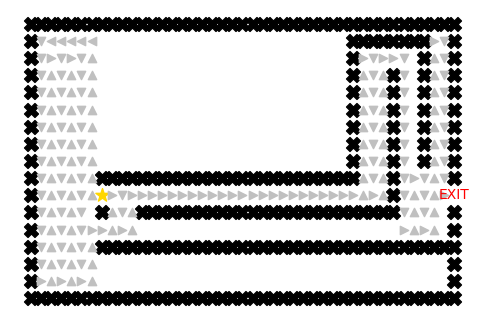

Breadth First Search


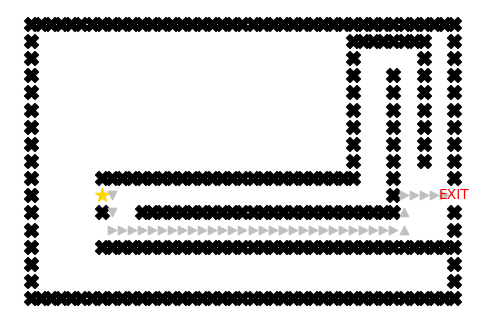

greedy_best_first_search


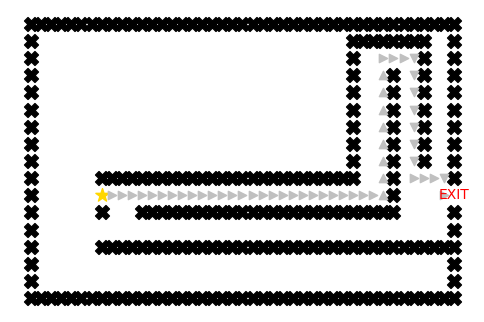

A_Star_Search


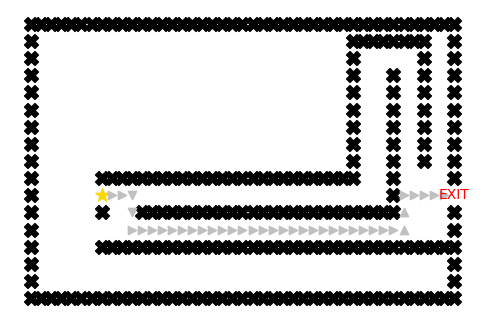

------------------------------------------------------------------------------------
matrix31X63
Ma trận Không có điểm thưởng thứ 2
Depth-First_Search


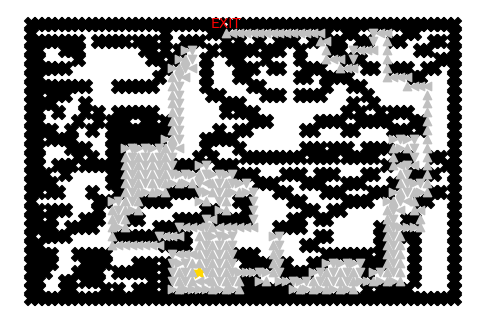

Breadth First Search


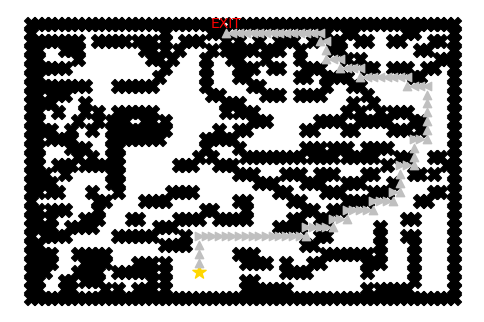

greedy_best_first_search


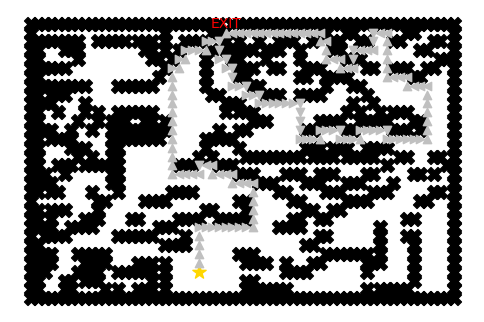

A_Star_Search


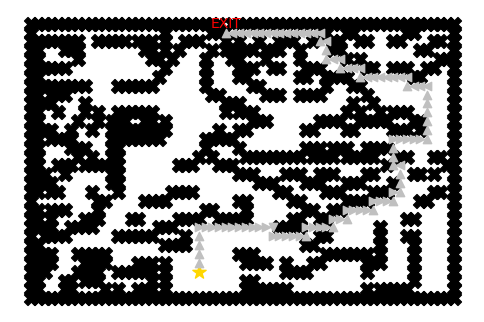

------------------------------------------------------------------------------------
matrix18X56
Ma trận Không có điểm thưởng thứ 3
Depth-First_Search


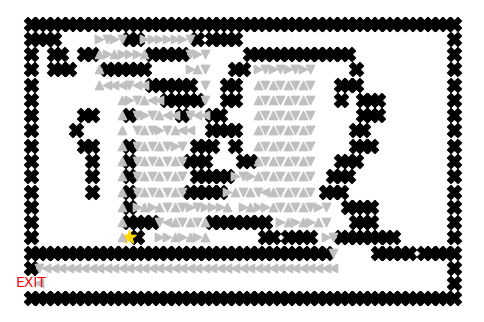

Breadth First Search


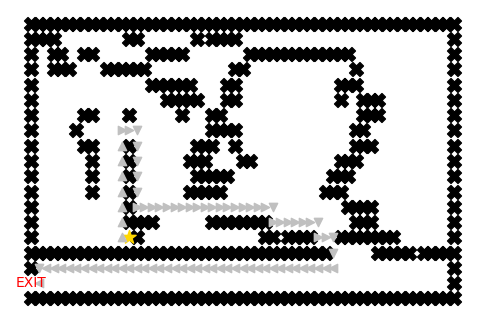

greedy_best_first_search


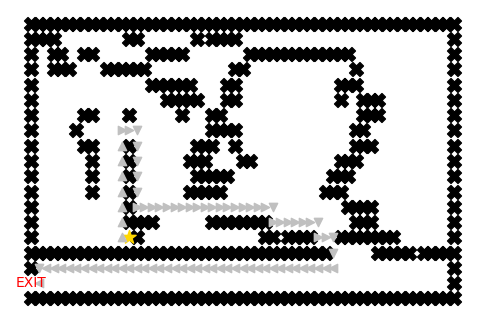

A_Star_Search


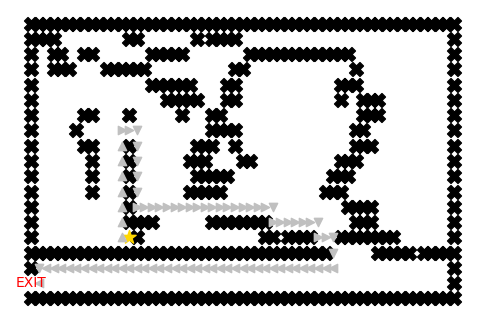

------------------------------------------------------------------------------------
matrix16X42
Ma trận Không có điểm thưởng thứ 4
Depth-First_Search


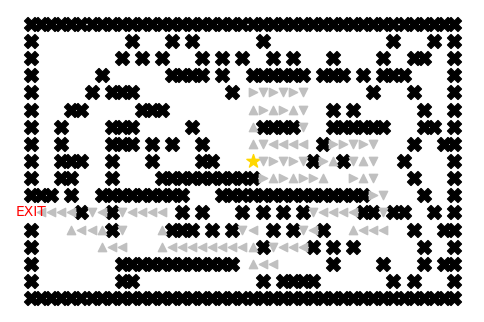

Breadth First Search


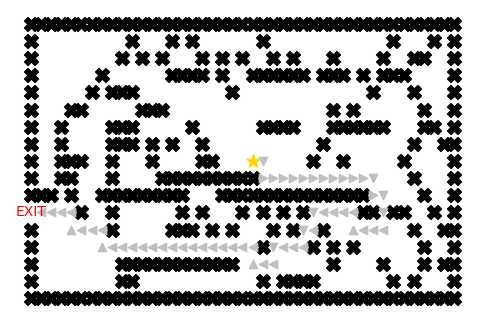

greedy_best_first_search


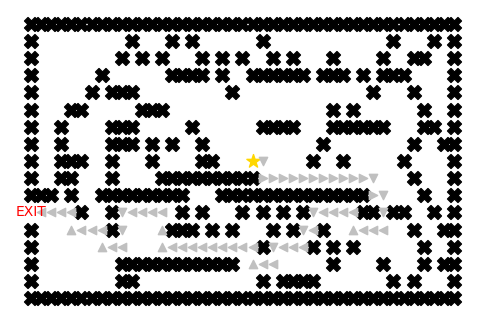

A_Star_Search


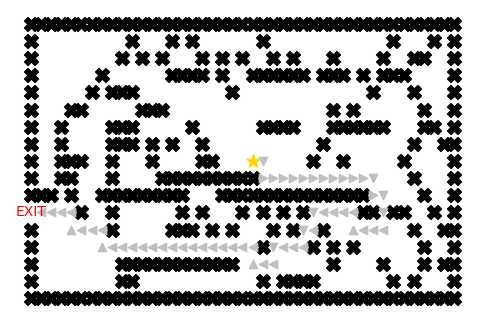

------------------------------------------------------------------------------------
matrix11X23
Ma trận Không có điểm thưởng thứ 5
Depth-First_Search


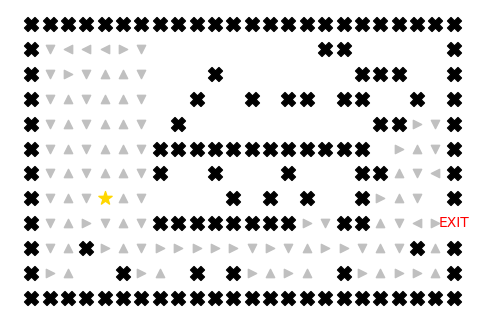

Breadth First Search


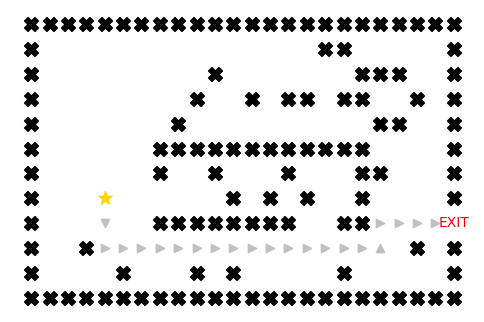

greedy_best_first_search


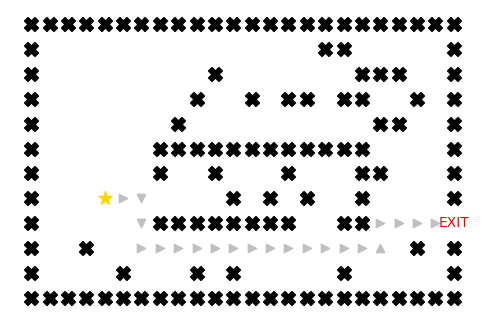

A_Star_Search


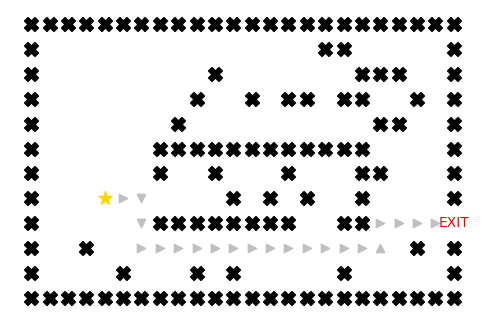

In [13]:
'''
In ra các bản đồ và đường đi tìm kiếm tương ứng
'''
for index in range(1,6):
    bonus_points, matrix = read_file(f'maze_map_no_bonus{index}.txt')
    # Find Start and End corodinate 
    end = [0,0]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=[i,j]
            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=[i,j]

            else:
                pass
    visited = []
    path = []
    print('------------------------------------------------------------------------------------')
    print(f'matrix{i}X{j}')
    print(f"Ma trận Không có điểm thưởng thứ {index}")
    print('Depth-First_Search')
    visualize_maze(matrix, bonus_points, start,end, dfs(start, visited, path))
    print('Breadth First Search')
    visualize_maze(matrix, bonus_points, start,end, bfs(start,end))
    print('greedy_best_first_search')
    visualize_maze(matrix, bonus_points, start,end, greedy_best_first_search(start,end))
    print('A_Star_Search')
    visualize_maze(matrix, bonus_points, start,end, A_asterisk(start,end))
    


# II/ BẢN ĐỒ CÓ ĐIỂM THƯỞNG 

## 1/ Vẽ bản đồ

## 1/ Thuật toán tìm đường thẳng tối ưu

In [16]:
def LeastCost(start, bonus = []):
    '''
    Hàm tìm đường đi tối ưu với chi phí thấp nhất
    Dùng giải thuật đệ qui 
    
    '''
    path = A_asterisk(start, end)
    cost = len(path) - 1
    if bonus == []: 
        return (cost, path)
    minimum = cost
    for u in bonus: 
        
        bonus_temp = copy.copy(bonus) 
        path_start_u = A_asterisk(start, u)
        cost_start_u = len(path_start_u) - 1
    
        bonus_temp.remove(u)
        (cost_u_end, path_u_end) = LeastCost(u, bonus_temp)
        if minimum > cost_start_u + bonus_value[bonus_xy.index(u)] + cost_u_end: 
            minimum = cost_start_u + bonus_value[bonus_xy.index(u)] + cost_u_end
            minimum_path = path_start_u+path_u_end
            
    if cost <= minimum:
        return (cost, path)
    else: 
        return (minimum, minimum_path)
    
            
        

Ban do thu 1
-5


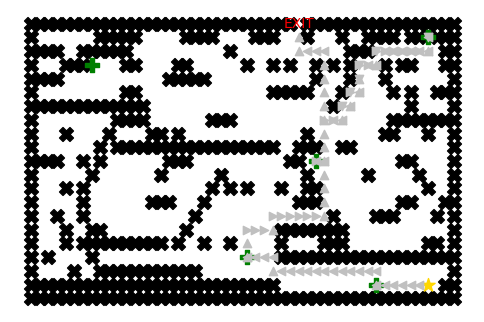

Ban do thu 2
1


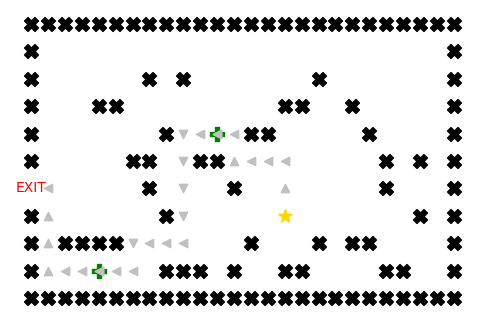

Ban do thu 3


KeyboardInterrupt: 

In [17]:
for index in range(1,4):
    bonus_points, matrix = read_file(f'maze_map_with_bonus{index}.txt')
    # Find Start and End corodinate 
    end = [0,0]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=[i,j]
            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=[i,j]
            else:
                pass

    bonus_xy = [[x[0],x[1]] for x in bonus_points]
    bonus_value = [x[2] for x in bonus_points]
    print(f"Ban do thu {index}")
    (cost, path) = LeastCost(start, bonus_xy)
    print(cost)
    visualize_maze(matrix, bonus_points, start,end, path)
    
